## INTRODUCTION

#### NAME : IQBAL JANITRA

#### BATCH : 003

## IMPORT LIBRARIES

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from feature_engine.outliers import Winsorizer
from phik import resources, report
from feature_engine.outliers import Winsorizer

# DATA LOADING

First, after we imported libraries, we need to load data, but we dont have clean data, we need to query the data before we load it, and as we know we should get the data from `Google Cloud Platform` which `census_adult_income` on the folder ml_datasets, from the data we need select `age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, dan income_bracket`, from `workclass` we need to remove ' ?' on this coloumns and for `hours_per_limit` we only choose less than 100, and here the query code for we get the data 

SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
 FROM `bigquery-public-data.ml_datasets.census_adult_income` 
 WHERE workclass != ' ?' AND hours_per_week < 100 #LIMIT BY OUR YEAR OF BIRTH TIMES 3
 LIMIT 5994

And here is it, we got the clear the data, next we load the data.


In [349]:
df=pd.read_csv("/Users/iqbaljanitra/Documents/PHASE 2/GC/GC 2/bquxjob_5bcf17ec_1859ec95f98.csv")

In [350]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,27,Private,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1,47,Self-emp-not-inc,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,90,United-States,<=50K
2,29,Private,HS-grad,9,Married-AF-spouse,Transport-moving,Husband,White,Male,0,0,80,United-States,<=50K
3,26,Private,HS-grad,9,Married-AF-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K
4,30,Private,HS-grad,9,Married-AF-spouse,Adm-clerical,Husband,White,Male,0,0,60,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,26,Private,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,35,United-States,<=50K
5990,44,Private,Some-college,10,Separated,Sales,Other-relative,Black,Female,0,0,35,United-States,<=50K
5991,24,Private,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
5992,47,Private,Some-college,10,Separated,Other-service,Not-in-family,Black,Female,0,0,35,United-States,<=50K


Show the size of the coloumns and rows

In [351]:
df.shape

(5994, 14)

Show the data type on every coloumns

In [352]:
df.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
dtype: object

The unique word and number on every coloumn

In [353]:
df.nunique()

age               70
workclass          8
education         16
education_num     16
marital_status     4
occupation        14
relationship       6
race               5
sex                2
capital_gain      67
capital_loss      53
hours_per_week    80
native_country    39
income_bracket     2
dtype: int64

# DATA CLEANING

### Handling Missing Value

this one we are going to check missing value on the data, and our data dont have missing value. so we can go to the next step

In [354]:
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

### Handling Duplicated Data

cheking duplicate data, and we just drop it

In [355]:
df.duplicated().value_counts()

False    5771
True      223
dtype: int64

droping duplicated data

In [356]:
df.drop(df[df.duplicated()].index, inplace=True)
# Reset the index
df.reset_index(drop=True)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,27,Private,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1,47,Self-emp-not-inc,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,90,United-States,<=50K
2,29,Private,HS-grad,9,Married-AF-spouse,Transport-moving,Husband,White,Male,0,0,80,United-States,<=50K
3,26,Private,HS-grad,9,Married-AF-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K
4,30,Private,HS-grad,9,Married-AF-spouse,Adm-clerical,Husband,White,Male,0,0,60,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,26,Private,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,35,United-States,<=50K
5767,44,Private,Some-college,10,Separated,Sales,Other-relative,Black,Female,0,0,35,United-States,<=50K
5768,24,Private,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
5769,47,Private,Some-college,10,Separated,Other-service,Not-in-family,Black,Female,0,0,35,United-States,<=50K


our data have been clean from duplicated data

In [357]:
df.duplicated().value_counts()

False    5771
dtype: int64

And after we get the information about our data, next step we do Exploration Data Anlysis or EDA.

# Exploratory Data Analysis (EDA)

In this section we do `Exploratory Data Analysis (EDA)` in this section we gonna find the correlation on income_bracket which feature have big correlation for income bracket.

In [358]:
numcol = df.select_dtypes(exclude=['object']).columns.tolist()
catcol = df.select_dtypes(include=['object']).columns.tolist()

Counting every value on categorical coloumns

In [403]:
for i in catcol:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

occupation

 Adm-clerical         1016
 Other-service         841
 Exec-managerial       749
 Prof-specialty        721
 Sales                 612
 Craft-repair          571
 Machine-op-inspct     390
 Transport-moving      238
 Handlers-cleaners     183
 Tech-support          177
 Farming-fishing       105
 Protective-serv       105
 Priv-house-serv        62
 ?                       1
Name: occupation, dtype: int64
----------
sex

 Female    3603
 Male      2168
Name: sex, dtype: int64
----------


descibe numerical coloumns

In [404]:
df[numcol].describe()

,capital_gain,education_num,hours_per_week
count,5771.000000,5771.000000,5771.000000
mean,732.167389,9.854618,40.237567
std,5534.114693,2.428707,11.265854
min,0.000000,1.000000,1.000000
25%,0.000000,9.000000,38.000000
50%,0.000000,9.000000,40.000000
75%,0.000000,11.000000,44.000000
max,99999.000000,16.000000,99.000000


### Check the correlation between categorical and numerical feature.

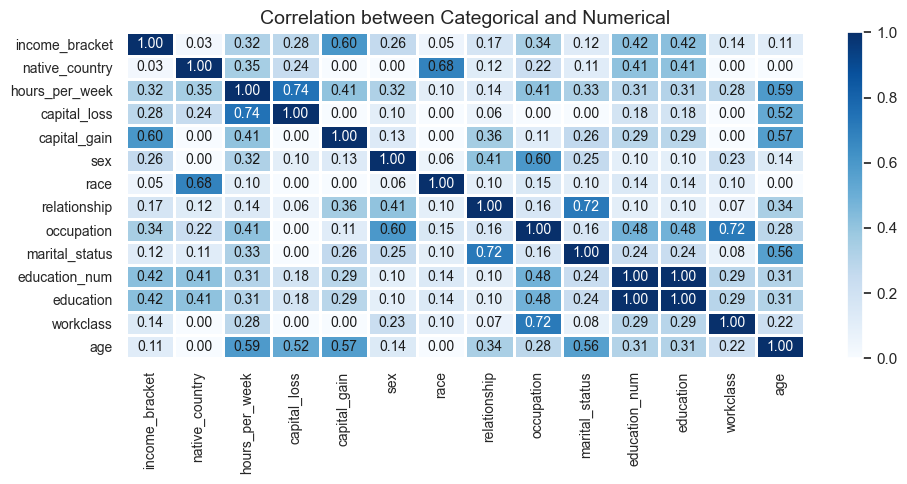

In [359]:
    phik_corr = df.phik_matrix(interval_cols='income_bracket')

    plot_correlation_matrix(phik_corr.values, 
                            x_labels=phik_corr.columns, 
                            y_labels=phik_corr.index,color_map='Blues', 
                            vmin=0, vmax=1, 
                            title=r"Correlation between Categorical and Numerical", 
                            figsize=(10,5))
plt.show()

In [360]:
df.corr()

,age,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.054753,0.028843,0.030571,-0.182071
education_num,-0.054753,1.000000,0.110946,0.046152,0.136192
capital_gain,0.028843,0.110946,1.000000,-0.024948,0.073697
capital_loss,0.030571,0.046152,-0.024948,1.000000,0.038123
hours_per_week,-0.182071,0.136192,0.073697,0.038123,1.000000


showing first 5 rows

In [362]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,27,Private,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1,47,Self-emp-not-inc,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,90,United-States,<=50K
2,29,Private,HS-grad,9,Married-AF-spouse,Transport-moving,Husband,White,Male,0,0,80,United-States,<=50K
3,26,Private,HS-grad,9,Married-AF-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K
4,30,Private,HS-grad,9,Married-AF-spouse,Adm-clerical,Husband,White,Male,0,0,60,United-States,<=50K


age is not have a correlation for income bracket, but lets see on age, avarage age every worker on every occupation is between 25-50, because age 25-50 is the productive age to work for every person

Text(0.5, 1.0, 'Counting total on every Age')

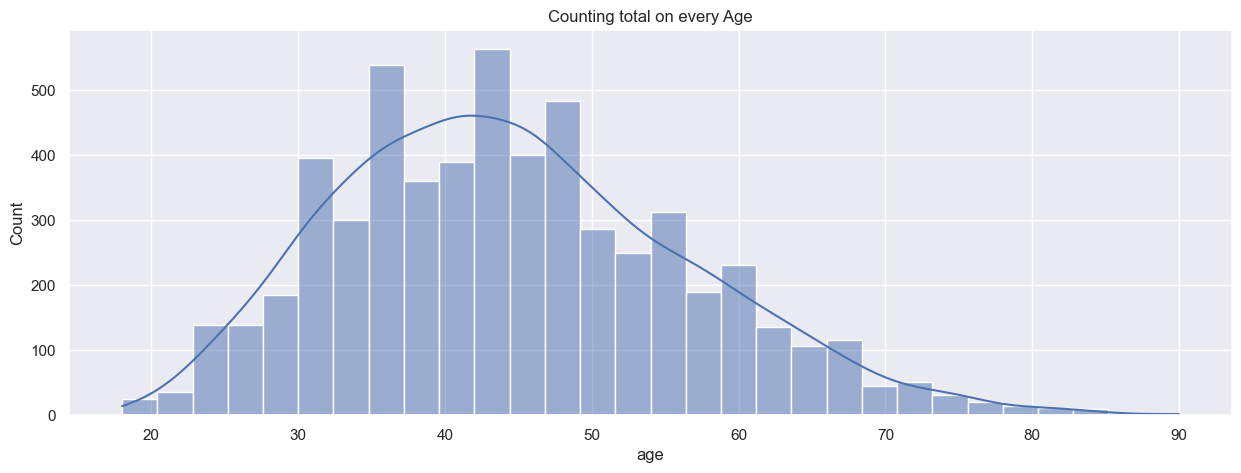

In [363]:
plt.figure(figsize=(15, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Counting total on every Age')

This plot show us how many ages have income bracket `>50k` and `<=50k`

show the capital loss and gain, we can see capital gain is to income which every person that have it, so we gona use `capital gain` as numerical feature

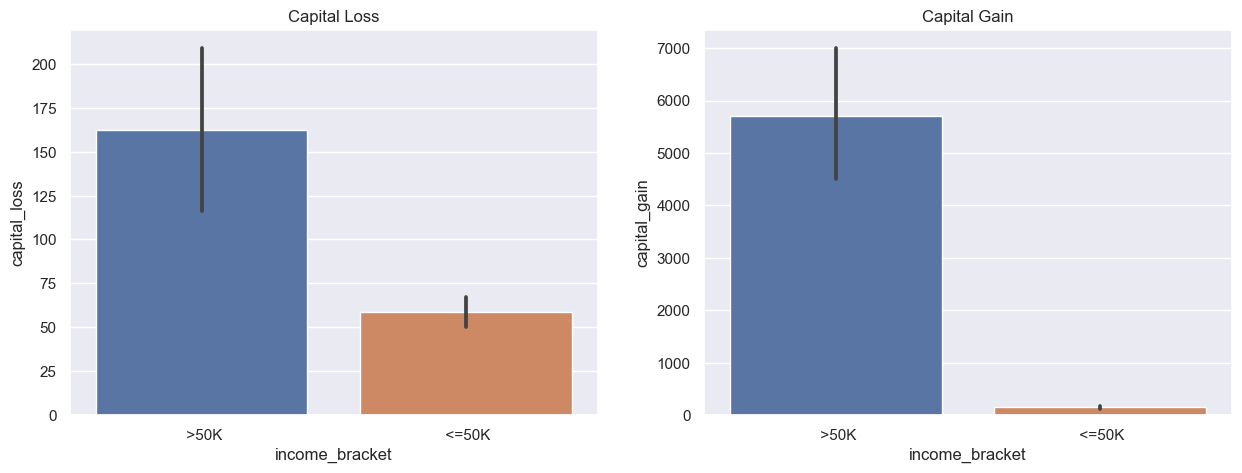

In [365]:

#Plot between income bracket per capital gain
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.set_theme()
sns.barplot(x=df['income_bracket'],y=df['capital_loss'])
plt.title('Capital Loss')

#Plot between income bracket per capital losss
plt.subplot(1, 2, 2)
sns.set_theme()
sns.barplot(x=df['income_bracket'],y=df['capital_gain'])
plt.title('Capital Gain')

plt.show()


Ploting workclass, occupotion and show it how much every income bracket on workclass and occupotion, and ofcourse the job is realy important for get income bracket, so, we gonaa use `workclass` and `accupation` as a numerical features

Text(0.5, 1.0, 'Workclass by capital gain')

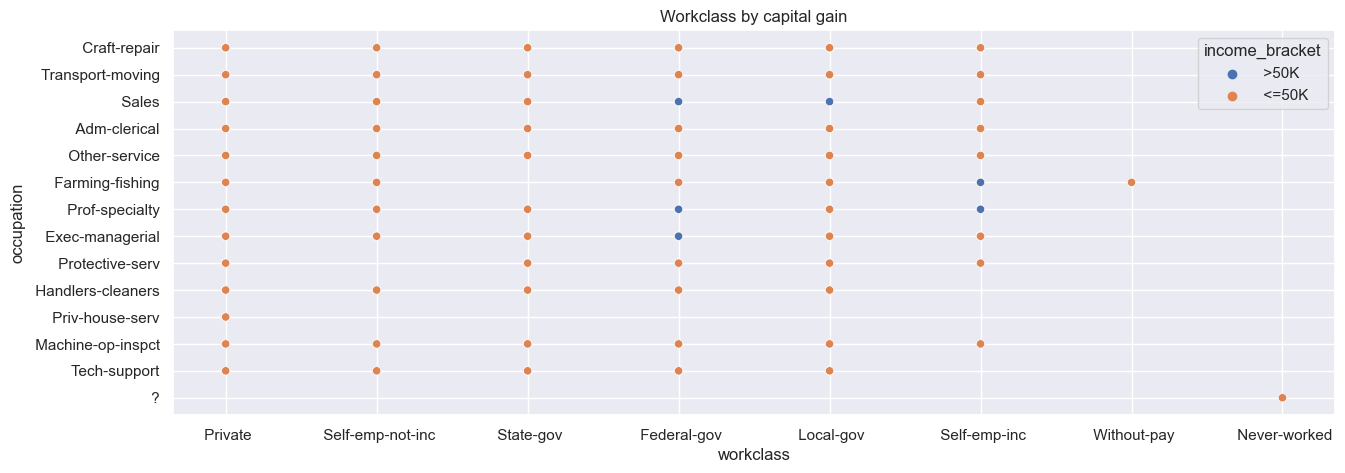

In [366]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.scatterplot(x=df['workclass'],y=df['occupation'],hue=df['income_bracket'])
plt.title('Workclass by capital gain')

Text(0.5, 1.0, 'workclass')

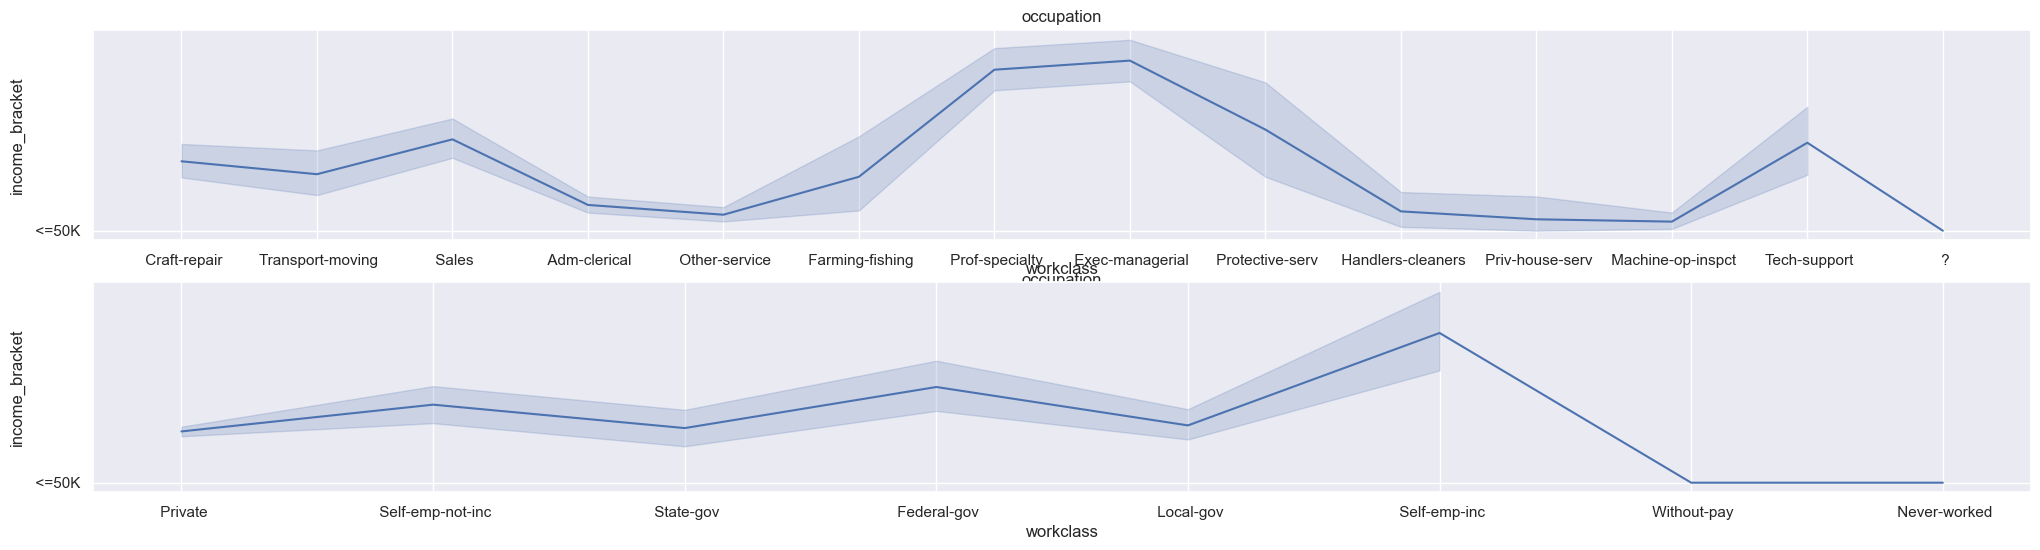

In [367]:

#Plot between income bracket per capital gain
fig, axes = plt.subplots(nrows = 2, figsize = (25, 6))
sns.set_theme()
sns.lineplot(x=df['occupation'],y=df['income_bracket'], ax=axes[0])
axes[0].set_title('occupation')

#Plot between income bracket per capital losss
sns.lineplot(x=df['workclass'],y=df['income_bracket'], ax=axes[1])
axes[1].set_title('workclass')

line plot between sex and income bracket, and it show the gander male have more income than female, so were going to use `sex` coloumns as features categorical

Text(0.5, 1.0, 'Capital Gain')

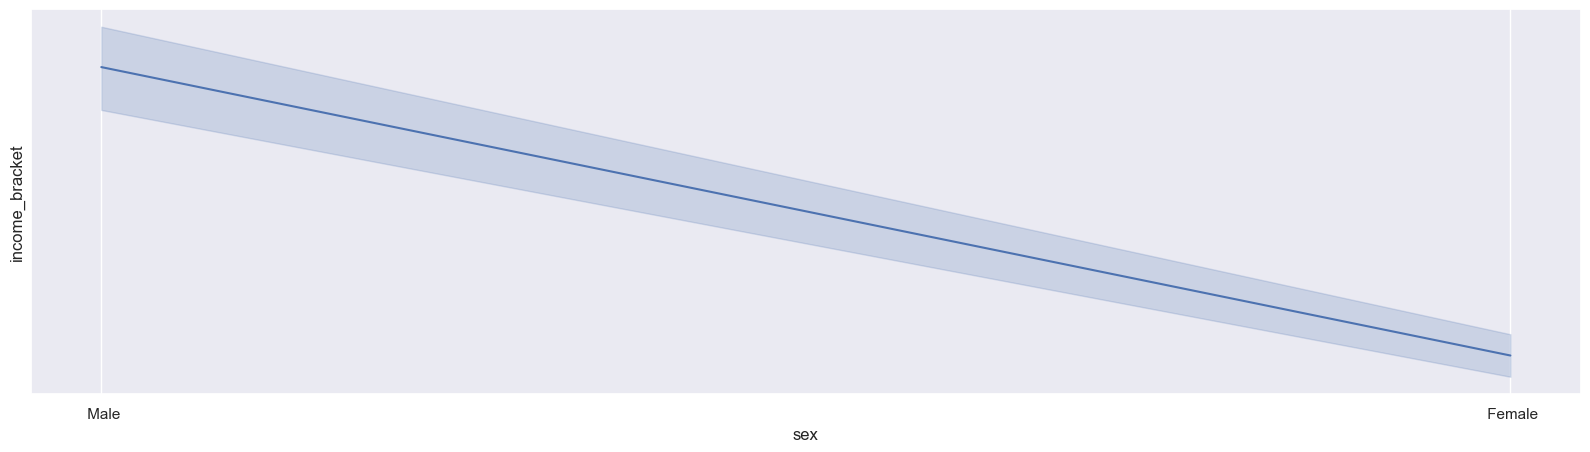

In [368]:
plt.figure(figsize=(20, 5))
sns.lineplot(x=df['sex'],y=df['income_bracket'])
axes[1].set_title('Capital Gain')

If you have different job or `occupation` ofcoure it have different income so we use `hours_per_week` as numerical feature

Text(0.5, 1.0, 'Capital Gain')

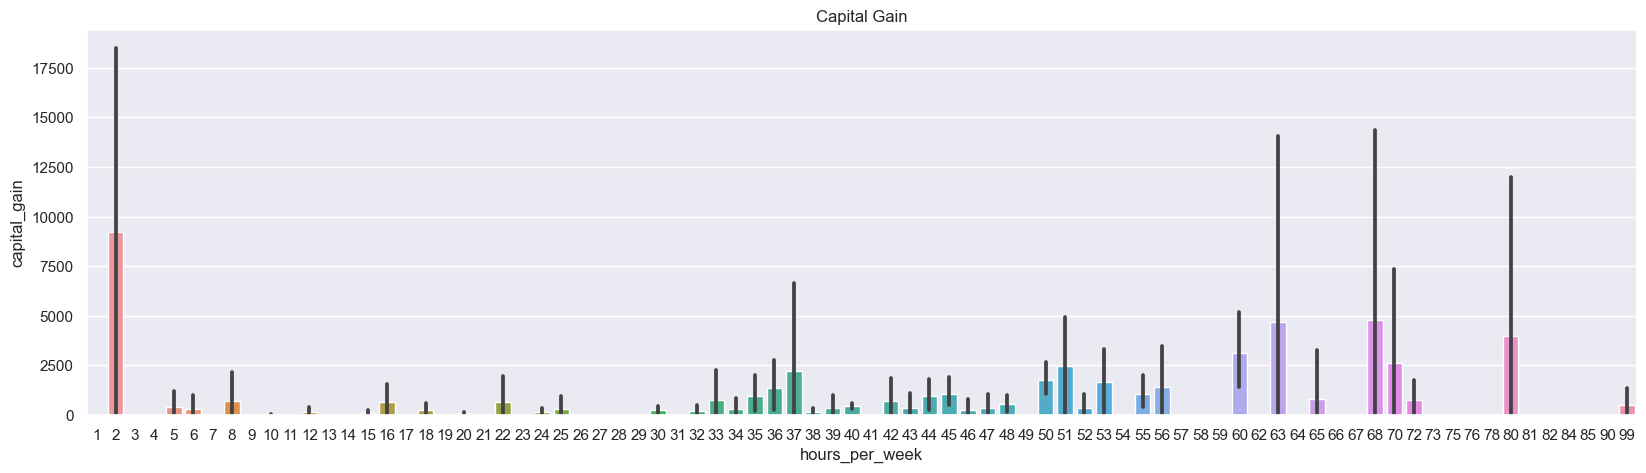

In [401]:
plt.figure(figsize=(20, 5))
sns.set_theme()
sns.barplot(x=df['hours_per_week'],y=df['capital_gain'])
plt.title('Capital Gain')


# Preprocessing

### Split between `X` (Features) and `y` (Target), and split between Train-Set and Test-Set

In [370]:
x = df.drop('income_bracket', axis=1)
y = df['income_bracket']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print('X Train Size : ', x_train.shape)
print('X Test Size  : ', x_test.shape)
print('')
print('Y Train Size : ', y_train.shape)
print('Y Test Size : ', y_test.shape)

X Train Size :  (4039, 13)
X Test Size  :  (1732, 13)

Y Train Size :  (4039,)
Y Test Size :  (1732,)


Making eda variable for EDA modeling

In [371]:
df_eda = pd.concat([x_train, y_train], axis=1)

df_eda.shape

(4039, 14)

## EDA MODELING

### Making variable between numerical coloumns and category coloumns

In [372]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000
mean,44.543927,9.854618,732.167389,69.471669,40.237567
std,11.925982,2.428707,5534.114693,368.482108,11.265854
min,18.000000,1.000000,0.000000,0.000000,1.000000
25%,36.000000,9.000000,0.000000,0.000000,38.000000
50%,43.000000,9.000000,0.000000,0.000000,40.000000
75%,52.000000,11.000000,0.000000,0.000000,44.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [373]:
numcol = df.select_dtypes(exclude=['object']).columns.tolist()
catcol = df.select_dtypes(include=['object']).columns.tolist()

In [374]:
numcol

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [375]:
catcol

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income_bracket']

## FEATURES SELECTION

In [376]:
numcol = ['capital_gain','education_num','hours_per_week']
catcol = ['occupation','sex']

Split Train-Set and Test-Set based on Column Types

In [377]:
X_train_num = x_train[numcol]
X_train_cat = x_train[catcol]

X_test_num = x_test[numcol]
X_test_cat = x_test[catcol]

Feature Scaling using MinMaxScaler

In [378]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.        , 0.8       , 0.38541667],
       [0.        , 0.53333333, 0.59375   ],
       [0.        , 0.73333333, 0.36458333],
       ...,
       [0.        , 0.53333333, 0.38541667],
       [0.        , 0.53333333, 0.4375    ],
       [0.        , 0.86666667, 0.38541667]])

In [379]:
X_train_num

,capital_gain,education_num,hours_per_week
3709,0,13,40
5412,0,9,60
3949,0,12,38
5159,0,6,40
5759,0,13,40
...,...,...,...
5146,0,5,40
3414,0,13,40
1700,0,9,40
2747,0,9,45


In [380]:
X_train_cat

,occupation,sex
3709,Prof-specialty,Female
5412,Sales,Male
3949,Craft-repair,Female
5159,Machine-op-inspct,Male
5759,Prof-specialty,Male
...,...,...
5146,Machine-op-inspct,Female
3414,Other-service,Male
1700,Handlers-cleaners,Male
2747,Exec-managerial,Female


## Handling Outliers

Use `IQR` for count of outliers and how much that impact to our data

In [381]:
Q3 = df['hours_per_week'].quantile(.75)
Q1 = df['hours_per_week'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df[(df['hours_per_week'] > upper) | (df['hours_per_week'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  1135
percentage of outlier:  19.66730202737827 %


making plot for visualization between the data and outliers so we can see the outliers.

In [382]:
def diagnostic_plots(x_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_train[variable])
    plt.title('Boxplot')

    plt.show()

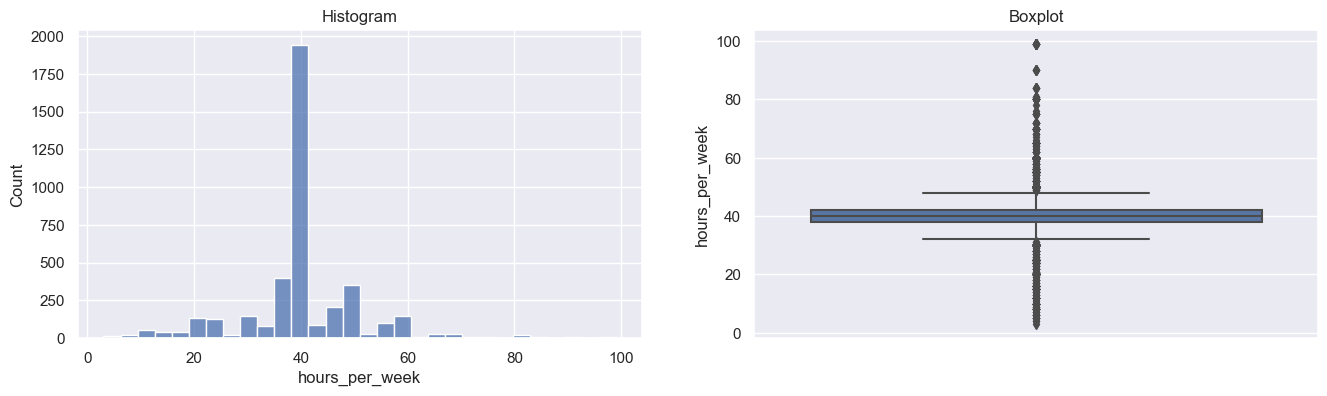

In [383]:
diagnostic_plots(x_train, 'hours_per_week')


### Capping the ourliers

In this technique, we cap our outliers data and make the limit, above a particular value or less than that value, all the values will be considered as outliers

In [384]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['hours_per_week'])

windsoriser.fit(X_train_num)

x_train_capp = windsoriser.transform(X_train_num)

In [385]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'hours_per_week': 32.0}
Right Tail Caps :  {'hours_per_week': 48.0}


In [386]:
print('x_train - Before Capping')
print(X_train_num.describe())
print('')
print('x_train - After Capping')
print(x_train_capp.describe())

x_train - Before Capping
       capital_gain  education_num  hours_per_week
count   4039.000000    4039.000000     4039.000000
mean     712.213172       9.826442       40.069819
std     5349.105776       2.413092       11.174383
min        0.000000       1.000000        3.000000
25%        0.000000       9.000000       38.000000
50%        0.000000       9.000000       40.000000
75%        0.000000      11.000000       42.000000
max    99999.000000      16.000000       99.000000

x_train - After Capping
       capital_gain  education_num  hours_per_week
count   4039.000000    4039.000000     4039.000000
mean     712.213172       9.826442       40.086655
std     5349.105776       2.413092        5.036855
min        0.000000       1.000000       32.000000
25%        0.000000       9.000000       38.000000
50%        0.000000       9.000000       40.000000
75%        0.000000      11.000000       42.000000
max    99999.000000      16.000000       48.000000


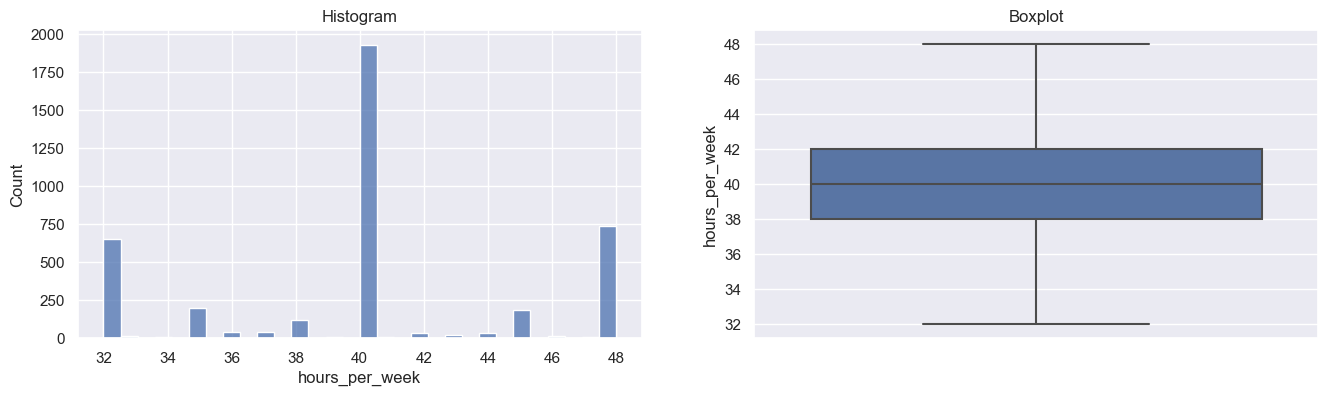

In [387]:
diagnostic_plots(x_train_capp, 'hours_per_week')

And our data just free from ourliers after we capping it.

### Feature Scaling using MinMaxScaler

we use `MinMaxScaler` Because the MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively, which good for our data than use `StandardScaler` scales all values between min and max so that they fall within a range from min to max.

In [388]:
scaler = MinMaxScaler()
scaler.fit_transform(x_train_capp)

X_train_num_scaled = scaler.transform(x_train_capp)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.        , 0.8       , 0.5       ],
       [0.        , 0.53333333, 1.        ],
       [0.        , 0.73333333, 0.375     ],
       ...,
       [0.        , 0.53333333, 0.5       ],
       [0.        , 0.53333333, 0.8125    ],
       [0.        , 0.86666667, 0.5       ]])

### Feature Encoding using OrdinalEcoder

In [389]:
#y_train_cv = y_train.replace({' <=50K':0, ' >50K':1})
#y_test_cv = y_test.replace({' <=50K':0, ' >50K':1})

we use `OrdinalEncoder` is for converting features to target variable

In [390]:
encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[ 9.,  0.],
       [11.,  1.],
       [ 2.,  0.],
       ...,
       [ 5.,  1.],
       [ 3.,  0.],
       [ 9.,  1.]])

### Concate between Numerical Columns and Categorical Columns

In [391]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final

array([[ 0.        ,  0.8       ,  0.5       ,  9.        ,  0.        ],
       [ 0.        ,  0.53333333,  1.        , 11.        ,  1.        ],
       [ 0.        ,  0.73333333,  0.375     ,  2.        ,  0.        ],
       ...,
       [ 0.        ,  0.53333333,  0.5       ,  5.        ,  1.        ],
       [ 0.        ,  0.53333333,  0.8125    ,  3.        ,  0.        ],
       [ 0.        ,  0.86666667,  0.5       ,  9.        ,  1.        ]])

In [392]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[numcol+catcol])
X_train_final_df

,capital_gain,education_num,hours_per_week,occupation,sex
0,0.0,0.800000,0.5000,9.0,0.0
1,0.0,0.533333,1.0000,11.0,1.0
2,0.0,0.733333,0.3750,2.0,0.0
3,0.0,0.333333,0.5000,6.0,1.0
4,0.0,0.800000,0.5000,9.0,1.0
...,...,...,...,...,...
4034,0.0,0.266667,0.5000,6.0,0.0
4035,0.0,0.800000,0.5000,7.0,1.0
4036,0.0,0.533333,0.5000,5.0,1.0
4037,0.0,0.533333,0.8125,3.0,0.0


### MODEL TRAINING

making model training for making model

In [393]:
model_log_reg = LogisticRegression()
svc = SVC(random_state=0)

### MODEL EVALUATION

concate `x` and `y` train for making logistic reggresion 

In [394]:
model_log_reg.fit(X_train_final_df, y_train)

LogisticRegression()

concate `x` and `y` train for making SVC

In [395]:
svc.fit(X_train_final, y_train)

SVC(random_state=0)

### Logistic Reggetion

`logistic regression` are those showing a unidirectional and inverse relationship between the independent and dependent variables.

In [396]:

y_pred_train = model_log_reg.predict(X_train_final_df)
y_pred_test = model_log_reg.predict(X_test_final)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.91      1.00      0.95      3626
        >50K       0.82      0.15      0.25       413

    accuracy                           0.91      4039
   macro avg       0.86      0.57      0.60      4039
weighted avg       0.90      0.91      0.88      4039

              precision    recall  f1-score   support

       <=50K       0.91      0.96      0.93      1535
        >50K       0.42      0.23      0.30       197

    accuracy                           0.88      1732
   macro avg       0.66      0.60      0.62      1732
weighted avg       0.85      0.88      0.86      1732



#### SVC

`Support Vector Machine` or `SVM` is a supervised machine learning algorithm that can be used for classification and regression

In [397]:
svc.fit(X_train_final, y_train)

SVC(random_state=0)

In [398]:
svc_train = svc.predict(X_train_final_df)
svc_test = svc.predict(X_test_final)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

       <=50K       0.90      1.00      0.95      3626
        >50K       0.00      0.00      0.00       413

    accuracy                           0.90      4039
   macro avg       0.45      0.50      0.47      4039
weighted avg       0.81      0.90      0.85      4039

              precision    recall  f1-score   support

       <=50K       0.89      1.00      0.94      1535
        >50K       0.00      0.00      0.00       197

    accuracy                           0.89      1732
   macro avg       0.44      0.50      0.47      1732
weighted avg       0.79      0.89      0.83      1732



### COUNCLUSION BETWEEN LOGISTIC REGGRESION AND SVC

As we can see `logistic reggresion` is so much better for our data because it has bigger score on every precission, recall, f1 score we can see on the `>50k` it have really bad score and even it have 0 score which means SVC model is not good at all for our data, and we conclude we use `logistic reggresion` for modeling our feattures.

# MODEL LOAD

In [399]:
with open('model_log_reg.pkl', 'wb') as file_1:
  joblib.dump(model_log_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(encoder, file_3)

with open('list_num_cols.txt', 'wb') as file_4:
  joblib.dump(numcol, file_4)

with open('list_cat_cols.txt', 'wb') as file_5:
  joblib.dump(catcol, file_5)

# Conceptual Problems

### Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan coeficient pada logistic regression?
2. Apakah yang dimaksud dengan Support Vector pada SVM?
3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

### Answere

1. `The coefficients` in the `logistic regression` are those showing a unidirectional and inverse relationship between the independent and dependent variables. the relationship between the independent variable and the dependent variable is a unidirectional relationship, it is a positive connection. This means that if there is an increase in the value of `X`, there will be an increase in `Y` or the dependent variable.  
And if it states that the relationship reverses direction is a negative connection. which means, if there is an increase in the value of `X`, there will be a decrease in the value of `Y`.

2. This technique is often applied to a large number of data sets to solve a problem in a study. `Support Vector Machine` or `SVM` is a supervised machine learning algorithm that can be used for classification and regression,

    `Linear SVM` is used for linearly separable data, which means if a dataset can be classified into two classes using a single straight line, then the data is referred to as linearly separable data, and the classifier used is referred to as Linear ` SVM classifier`.

    `SVM non-linear` is used for data that can be separated non-linearly, which means if a dataset cannot be classified using a straight line, then the data is called non-linear data and the classifier used is called `Non-linear SVM classifier` .

3. Kernel functions for sequence data, graphs, text, images, as well as vectors. The most used type of kernel function is RBF. Because it has localized and finite response along the entire x-axis. The kernel functions return the inner product between two points in a suitable feature space. Thus by defining a notion of similarity, with little computational cost even in very high-dimensional spaces.
   
   `Let us see some common kernels used with SVMs and their uses :`
    There is many types of kernels there is `Polynomial kernel`, `Gaussian kernel`, `Gaussian radial basis function (RBF)`, `Laplace RBF kernel`, `Hyperbolic tangent kernel`, `Sigmoid kernel`, `Bessel function of the first kind Kernel`, `ANOVA radial basis kernel`, `Linear splines kernel in one-dimension`. but now were going to talk about `polynominal kernel`

    **Polynominal Kernel** is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models. 
    
    the polynominal function is just a mathematical function which use for converts a low-dimensional input space into a higher-dimensional space. This is done by mapping the data into a new feature space. In this space, the data will be linearly separable. This means that a support vector machine can be used to find a hyperplane that separates the data.

    For example, if the input 𝑥 is two-dimensional, the kernel function will map it into a three-dimensional space. In this space, the data will be linearly separable. 


# CONCLUSION

Based on the EDA just we did, we want to choose a numercilcal coloumn are `capital_gain`,`education_num`,`hours_per_week` and for 
categorycal coloumns we use `occupation`,`sex` as a `feature` because every coloumns which have been selected have a correlation for `income_bracket` why? for `capital_gain` its a profit each person and give more income for people that have it, `education` of course education greatly influences salary, because there are many companies that look at graduates, and differentiate salaries, and for `hours_per_week` that is the length of working hours each week, of course the longer we work, the more income we get. For categorical `occupation` is the type of the job of course in every job has a different salary and `sex` is really importan for some occupation maybe it need specific gender.

After we do EDA, and modelin and we got the feature that we want, we just set up data for making modeling and we use loggistic reggresion for our model to predict how much `income_bracket` based on the feature we choose.